<a href="https://colab.research.google.com/github/b1sruthi/Sruthi_Data606/blob/main/docs/src/final_changes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#from mixed_naive_bayes import MixedNB
from sklearn.metrics import roc_curve, auc 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import tree 
from sklearn import svm
import seaborn as sns
import pandas as pd
import numpy as np
import mlxtend

In [2]:
credit_df = pd.read_csv('/content/creditcard.csv')
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
# performing eda
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,210013.000000,210013.000000,210013.000000,210013.000000,210013.000000,210013.000000,210013.000000,210013.000000,210013.000000,210013.000000,...,210012.000000,210012.000000,210012.000000,210012.000000,210012.000000,210012.000000,210012.000000,210012.000000,210012.000000,210012.000000
mean,73737.509878,-0.085703,-0.002471,0.265572,0.063072,-0.091151,0.040804,-0.040030,0.011901,0.007007,...,-0.011627,-0.037288,-0.013747,0.003126,0.051676,0.004613,0.001043,0.001568,89.951723,0.001876
std,36513.266525,1.907570,1.629480,1.465058,1.403075,1.363654,1.314757,1.218114,1.203974,1.130707,...,0.735653,0.697612,0.617554,0.604496,0.498516,0.487684,0.395146,0.318274,248.087723,0.043273
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,45489.000000,-0.955127,-0.587401,-0.428764,-0.805003,-0.769694,-0.718087,-0.572324,-0.186724,-0.661958,...,-0.226297,-0.535085,-0.168195,-0.344903,-0.253835,-0.331420,-0.068170,-0.044455,5.990000,0.000000
50%,69325.000000,-0.062899,0.076713,0.445943,0.063919,-0.150262,-0.225473,-0.001614,0.039117,-0.071405,...,-0.039727,-0.025132,-0.026832,0.050656,0.092614,-0.061362,0.004968,0.017487,23.000000,0.000000
75%,110010.000000,1.225287,0.781543,1.194398,0.866750,0.492869,0.440468,0.515107,0.335470,0.621224,...,0.157789,0.443546,0.119421,0.424135,0.380435,0.258253,0.089003,0.077898,79.580000,0.000000
max,137803.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [4]:
#checking for null values
credit_df.isnull().sum().max()

1

In [5]:
#checking the number of columns
credit_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
#checking the number of fraud and non-fraud classes
print('No Frauds', round(credit_df['Class'].value_counts()[0]/len(credit_df) * 100,2), '% of the dataset')
print('Frauds', round(credit_df['Class'].value_counts()[1]/len(credit_df) * 100,2), '% of the dataset')

No Frauds 99.81 % of the dataset
Frauds 0.19 % of the dataset


In [7]:
#checking the data type 
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210013 entries, 0 to 210012
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    210013 non-null  float64
 1   V1      210013 non-null  float64
 2   V2      210013 non-null  float64
 3   V3      210013 non-null  float64
 4   V4      210013 non-null  float64
 5   V5      210013 non-null  float64
 6   V6      210013 non-null  float64
 7   V7      210013 non-null  float64
 8   V8      210013 non-null  float64
 9   V9      210013 non-null  float64
 10  V10     210013 non-null  float64
 11  V11     210013 non-null  float64
 12  V12     210013 non-null  float64
 13  V13     210013 non-null  float64
 14  V14     210012 non-null  float64
 15  V15     210012 non-null  float64
 16  V16     210012 non-null  float64
 17  V17     210012 non-null  float64
 18  V18     210012 non-null  float64
 19  V19     210012 non-null  float64
 20  V20     210012 non-null  float64
 21  V21     21

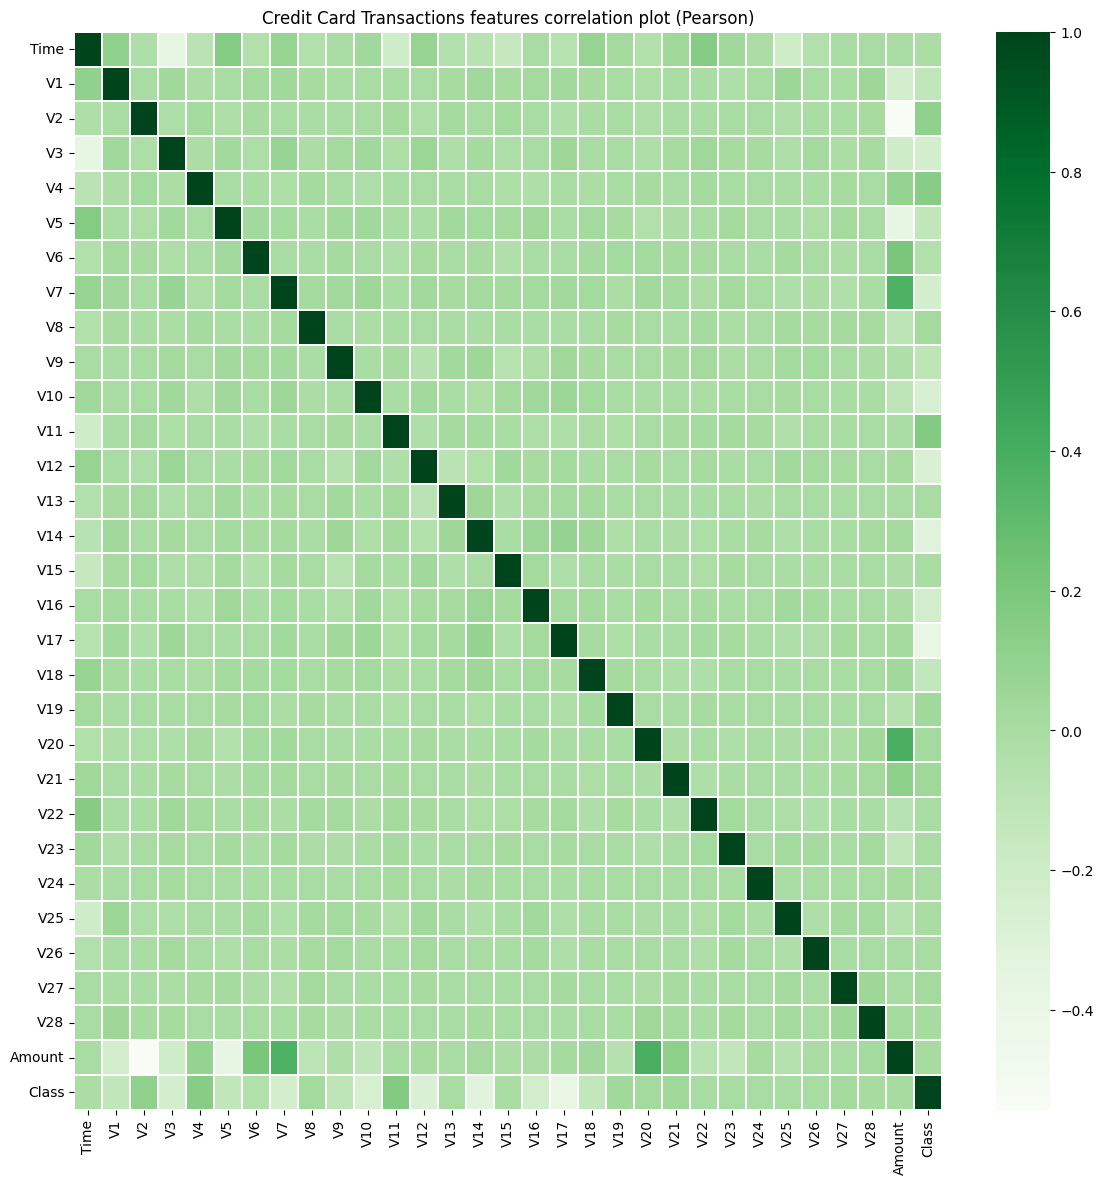

In [8]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = credit_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens")
plt.show()

##### Since, there are no null values and the data seems fine we do not need to use the normalization techniques to perform data cleaning.

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

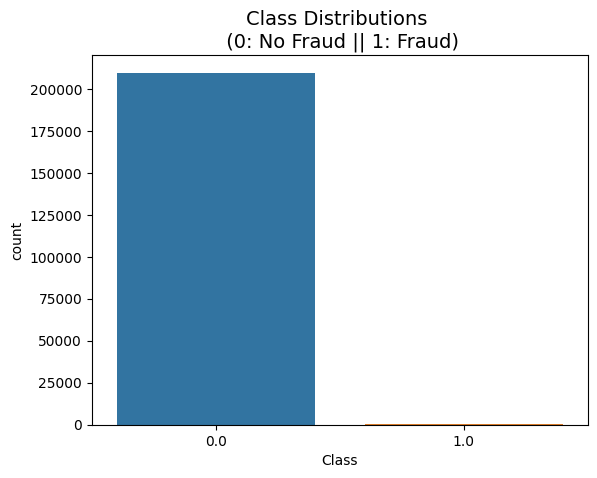

In [9]:
sns.countplot(x='Class', data=credit_df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

understanding the distribution of data

In [10]:
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [11]:
credit_df = credit_df.dropna()

In [12]:
X = credit_df[['Amount','Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']]
y = credit_df['Class']

In [13]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

df_ = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [15]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
train_y_pred = rf_clf.predict(X_train)
test_y_pred = rf_clf.predict(X_test)

In [17]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Random Forest Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Random Forest Classifier Test Classification Report: \n\n', test_report)

Random Forest Classifier Train Classification Report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    157491
         1.0       1.00      1.00      1.00    156936

    accuracy                           1.00    314427
   macro avg       1.00      1.00      1.00    314427
weighted avg       1.00      1.00      1.00    314427
 


Random Forest Classifier Test Classification Report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52127
         1.0       1.00      1.00      1.00     52682

    accuracy                           1.00    104809
   macro avg       1.00      1.00      1.00    104809
weighted avg       1.00      1.00      1.00    104809



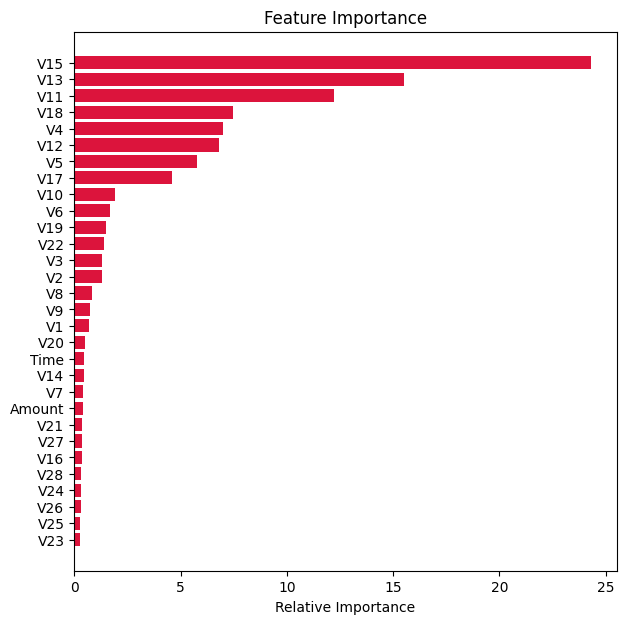

In [18]:
# Calculating the feature importance

feature_importance = rf_clf.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))

# Displaying the relative feature importance by a horizontal bar chart 

sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 7))

plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, credit_df.columns[0:-1][sorted_idx])
plt.show()

In [19]:
X = credit_df[['V3','V4','V5','V11','V12','V13','V15','V17','V18']]
y = credit_df['Class']

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

df_ = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [22]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
train_y_pred = rf_clf.predict(X_train)
test_y_pred = rf_clf.predict(X_test)

In [24]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Random Forest Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Random Forest Classifier Test Classification Report: \n\n', test_report)

Random Forest Classifier Train Classification Report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    157491
         1.0       1.00      1.00      1.00    156936

    accuracy                           1.00    314427
   macro avg       1.00      1.00      1.00    314427
weighted avg       1.00      1.00      1.00    314427
 


Random Forest Classifier Test Classification Report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52127
         1.0       1.00      1.00      1.00     52682

    accuracy                           1.00    104809
   macro avg       1.00      1.00      1.00    104809
weighted avg       1.00      1.00      1.00    104809



In [25]:
# Importing 'LinearRegression' through linear_model module

from sklearn.linear_model import LinearRegression  
#performing linear regression.
reg = LinearRegression()         # Instantiate
reg.fit(X_train, y_train)        # Fit the train data

LinearRegression()

In [26]:
 # Calculating R^2 score for train
r2_train_score = reg.score(X_train, y_train)  

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.5809 

Coefficients of Linear Model: [-0.00373267  0.06666693  0.00670803  0.03203347 -0.02214878 -0.04676068
  0.03850792 -0.01945225  0.0616192 ] 

Intercept: 0.2036813592775817


In [27]:
# calculating the predictions

y_pred = reg.predict(X_test)
y_pred[:20]  # show predictions of first 20 data points in test dataset

array([0.68116759, 0.22517082, 1.06079648, 1.20186933, 1.08091889,
       0.36533007, 0.68723383, 1.07387626, 1.12753782, 0.70314048,
       1.21585421, 1.0483549 , 0.87384531, 0.88582432, 0.36334192,
       0.21248445, 0.40029551, 0.68116759, 0.02303827, 0.31983553])

In [28]:
# calculate performance of the model for test subset and Calculating R^2 score for train
r2_test_score = reg.score(X_test, y_test)  
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for test dataset =  0.5807 



In [29]:
from sklearn import tree 

tr_reg = tree.DecisionTreeRegressor()
tr_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [30]:
# Finding the predictions of the tree regressor for train and test subsets

train_y_pred = tr_reg.predict(X_train)
test_y_pred = tr_reg.predict(X_test)

In [31]:
r2_train_score = tr_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = tr_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  1.0 

R^2 score for test dataset =  0.9898 



In [32]:
# Importing BaggingRegressor from ensemble module

from sklearn.ensemble import BaggingRegressor

# Instantiating the bagged-tree regressor
bag_reg = BaggingRegressor(base_estimator=tree.DecisionTreeRegressor(), n_estimators=100, random_state=3)
bag_reg.fit(X_train, y_train)  # Fitting the train data

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=3)

In [33]:
# Finding the predictions of bagged-tree regressor for train and test subsets

train_y_pred = bag_reg.predict(X_train)
test_y_pred = bag_reg.predict(X_test)

In [34]:
r2_train_score = bag_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = bag_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  0.9994 

R^2 score for test dataset =  0.9961 



In [35]:
from sklearn.linear_model import LogisticRegression   

logreg = LogisticRegression(penalty = 'none', max_iter = 10000) 

logreg.fit(X_train, y_train) 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=10000, penalty='none')

In [36]:
# Predict probabilities for first 10 instances in train and test subsets :

y_train_pred_prob = logreg.predict_proba(X_train)  
y_test_pred_prob = logreg.predict_proba(X_test)    
print('Train predictions for probabilities:\n\n', y_train_pred_prob[:10],'\n')
print('Test predictions for probabilities:\n\n', y_test_pred_prob[:10])

Train predictions for probabilities:

 [[7.53224962e-01 2.46775038e-01]
 [1.55633605e-03 9.98443664e-01]
 [9.90692900e-01 9.30709955e-03]
 [5.45534608e-01 4.54465392e-01]
 [7.44534644e-07 9.99999255e-01]
 [1.70781532e-04 9.99829218e-01]
 [9.46947794e-01 5.30522062e-02]
 [2.03733461e-03 9.97962665e-01]
 [1.44106588e-02 9.85589341e-01]
 [8.72621471e-01 1.27378529e-01]] 

Test predictions for probabilities:

 [[7.79674263e-05 9.99922033e-01]
 [9.50581876e-01 4.94181244e-02]
 [1.06157140e-08 9.99999989e-01]
 [2.42479636e-09 9.99999998e-01]
 [8.61711336e-09 9.99999991e-01]
 [8.93263949e-01 1.06736051e-01]
 [1.19752946e-03 9.98802471e-01]
 [3.11766390e-09 9.99999997e-01]
 [1.46878065e-11 1.00000000e+00]
 [1.30666819e-03 9.98693332e-01]]


In [37]:
y_train_pred = y_train_pred_prob.argmax(axis=1)  
y_test_pred = y_test_pred_prob.argmax(axis=1)  
print('Predicted class for train: ', y_train_pred[:10],'\n')     
print('Predicted class for test: ', y_test_pred[:10])


Predicted class for train:  [0 1 0 0 1 1 0 1 1 0] 

Predicted class for test:  [1 0 1 1 1 0 1 1 1 1]


In [38]:
# Calculating accuracy of model

from sklearn import metrics  

train_score = metrics.accuracy_score(y_train, y_train_pred) 

test_score = metrics.accuracy_score(y_test, y_test_pred)   

print('Train accuracy score of the model is ', round(train_score, 5),'\n')
print('Test accuracy score of the model is ', round(test_score, 5))

Train accuracy score of the model is  0.93356 

Test accuracy score of the model is  0.93299


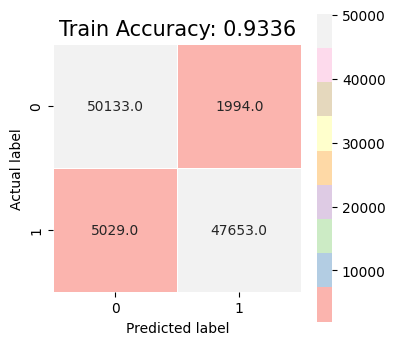

Classification Report for the Test Subset: 

               precision    recall  f1-score   support

         0.0       0.91      0.96      0.93     52127
         1.0       0.96      0.90      0.93     52682

    accuracy                           0.93    104809
   macro avg       0.93      0.93      0.93    104809
weighted avg       0.93      0.93      0.93    104809



In [39]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

train_c_matrix = confusion_matrix(y_test, y_test_pred)  # Compute the train confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train Accuracy: {0}'.format(round(train_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

# Classification Report

print('Classification Report for the Test Subset: \n\n', classification_report(y_test, y_test_pred))